# Lecture 6 - Intro to Visualization: When and Why; Visualization Aesthetics

## Announcements

* Thursday office hours have changed slightly: now 11:00-11:30 and 12:00-12:30.
  * Sorry if you showed up between 10:30 and 11 yesterday and I wasn't there =(
 
* Quiz 1 grades were released on gradescope - were you able to log in and see them?
  * I generally transfer grades to Canvas about a week after I release on Gradescope

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Goals
* Understand the importance of visualization as a tool for understanding data.
* Know some of the different settings in which visualization is used.
* Understand some principles of how to make good visualizations
    * Maximize data-ink ratio
    * Minimize lie factor
    * Minimize chartjunk
    * Use scales and labeling well
    * Use Color Well
    * Use Repetition Well

## Big Idea: Why visualize?

Consider **Anscombe's Quartet**:

In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

In [2]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Hey, they're all the same! ...right? Let's confirm by visualizing:

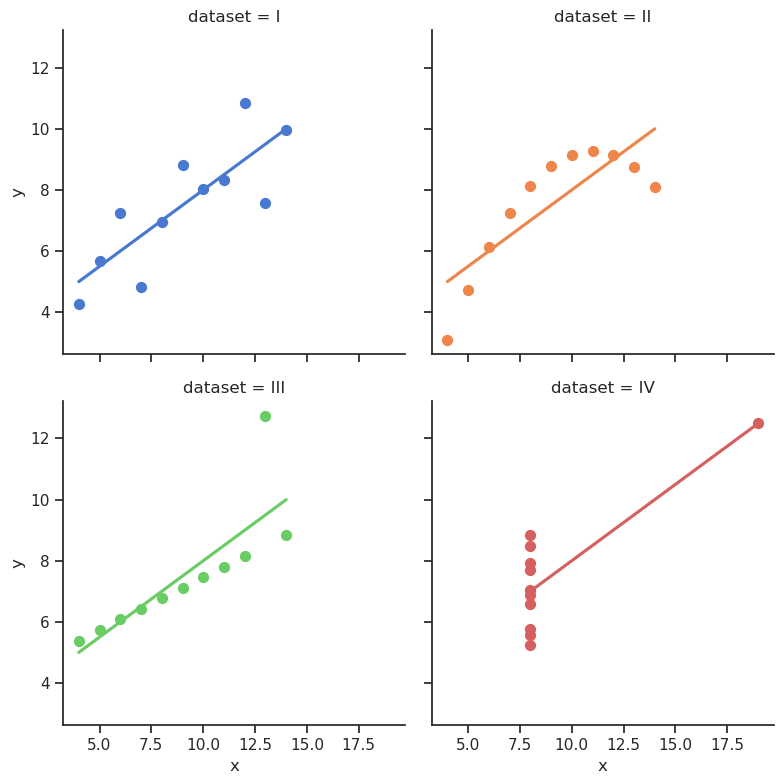

In [3]:
# Show a scatter plot with a regression line for each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

Hmm, that didn't come out how I thought it would.

**Takeaway:** visualization is often the best (and sometimes the only) way to understand a dataset.

## When should you visualize?

* When **exploring** data 
  * for me, this often looks like `df.plot.*`
  * Goal: show you what's going on; answer questions for yourself.
* When **presenting** data 
  * for me, this often looks like `sns.*(...)` along with a bunch of matplotlib code to fine-tune the appearance.
  * Goal: show your reader what's going on; tell a story about the data, clearly and faithfully.
* When providing **interactive** visualization tools for consumers of your data; examples:
  * https://www.mountwashington.org/experience-the-weather/current-summit-conditions.aspx
  * https://pudding.cool/projects/vocabulary/

## What makes a good visualization?

This is like asking what makes a good painting - it requires a sense of aesthetics.

Some principles to live by, based on the work of visualization pioneer Edward Tufte:
#### Maximize data-ink ratio

The **data-ink** ratio is the amount of "ink" used to represent data divided by the total amount of "ink" in the graphic:

$$ \frac{\textrm{ink used to represent data}}{\textrm{total ink in the graphic}}$$

![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/di.png)

#### Minimize lie factor

The **lie factor** is the ratio between the size of the effect in your graphic and the size of the effect in the data:

$$ \frac{\textrm{size of effect in the graphic}}{\textrm{size of effect in the data}}$$

![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/lie.png)

#### Minimize chartjunk
**Chartjunk** is loosely defined as extraneous visual elements that do not further the purpose of the graphic.

![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/cj.png)


#### Use scales and labeling well

* Fill the available space with data (without increasing the lie factor)
* Use clear labels

#### Use color and shading well

* Colors can be used to differentiate categorical or numerical values.
* For numerical/continuous, use perceptually uniform colormaps.
* Avoid large areas of bright colors; small areas of sharp color contrast can be powerful visual elements.

![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/color.png)

#### Use repetition well

* **Reuse** the cognitive effort your reader puts in to understand one plot
* Small multiples - many small charts of the same thing, e.g., for different categories
    * Example: `sns.pairplot`
* Multiple time series on a single set of axes

![](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/sm.png)

Activity: analyze a [plot](https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L06/vis_examples.pdf)!

Write:
* Your plot number
* The names of your group members
* Analysis of the plot with respect to at least three of the above principles
    * Maximize data-ink ratio
    * Minimize lie factor
    * Minimize chartjunk
    * Use scales and labeling well
    * Use Color Well
    * Use Repetition Well
* Be prepared to share the most pertinent principle with the class in 1 minute or less.